In [1]:
# load training data

from glob import glob
from scipy.misc import imread
import numpy as np

images = []
genders = []

print('Loading data...')

image_paths = glob('./data/girl/*')

for path in image_paths:
    data = imread(path, flatten=True).flatten()
    images.append(data)
    genders.append((1, 0))

image_paths = glob('./data/guy/*')

for path in image_paths:
    data = imread(path, flatten=True).flatten()
    images.append(data)
    genders.append((0, 1))

images = np.asarray(images)
genders = np.asarray(genders)

print('Done.') 

print('Shape of data matrices:')
print(images.shape)
print(genders.shape)

print('Shape of one data entries:')
print(images[0])
print(genders[0])

Loading data...
Done.
Shape of data matrices:
(13513, 1024)
(13513, 2)
Shape of one data entries:
[ 101.  183.  241. ...,  102.  100.  124.]
[1 0]


In [2]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
        Dense(200, activation='relu', input_dim=images[0].size),
        Dense(200, activation='relu'),
        Dense(200, activation='relu'),
        Dense(200, activation='relu'),
        Dense(200, activation='relu'),
        Dense(200, activation='relu'),
        Dense(200, activation='relu'),
        Dense(200, activation='relu'),
        Dense(200, activation='relu'),
        Dense(200, activation='relu'),
        Dense(200, activation='relu'),
        Dense(200, activation='relu'),
        Dense(200, activation='relu'),
        Dense(200, activation='relu'),
        Dense(200, activation='relu'),
        Dense(200, activation='relu'),
        Dense(2, activation='softmax'),
    ])

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(images, genders, validation_split=0.2)

Using TensorFlow backend.


Train on 10810 samples, validate on 2703 samples
Epoch 1/10
10810/10810 [==============================] - 11s - loss: 0.6320 - acc: 0.6487 - val_loss: 1.8112 - val_acc: 0.1010
Epoch 2/10
10810/10810 [==============================] - 9s - loss: 0.5543 - acc: 0.7280 - val_loss: 0.5477 - val_acc: 0.7455
Epoch 3/10
10810/10810 [==============================] - 10s - loss: 0.5023 - acc: 0.7611 - val_loss: 0.1905 - val_acc: 0.9593
Epoch 4/10
10810/10810 [==============================] - 10s - loss: 0.4682 - acc: 0.7876 - val_loss: 0.6560 - val_acc: 0.7366
Epoch 5/10
10810/10810 [==============================] - 10s - loss: 0.4526 - acc: 0.7911 - val_loss: 0.5702 - val_acc: 0.7407
Epoch 6/10
10810/10810 [==============================] - 10s - loss: 0.4104 - acc: 0.8183 - val_loss: 0.2708 - val_acc: 0.8820
Epoch 7/10
10810/10810 [==============================] - 10s - loss: 0.3897 - acc: 0.8276 - val_loss: 0.6389 - val_acc: 0.6463
Epoch 8/10
10810/10810 [==============================] 

<IPython.core.display.Javascript object>

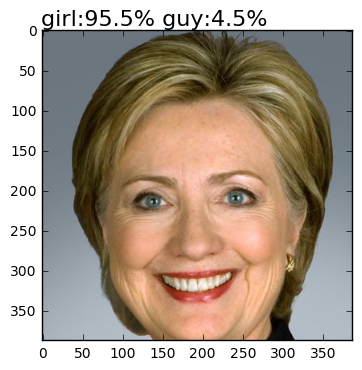

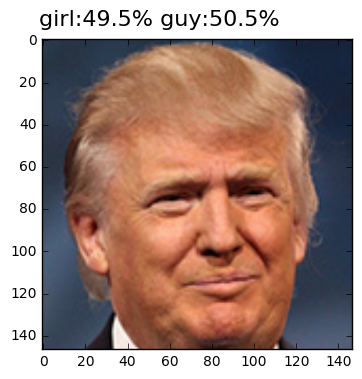

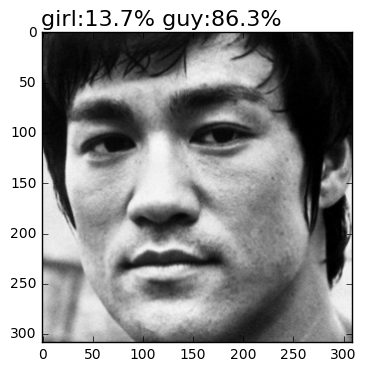

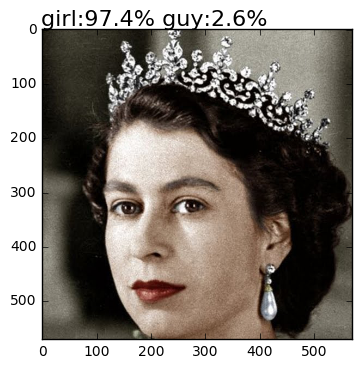

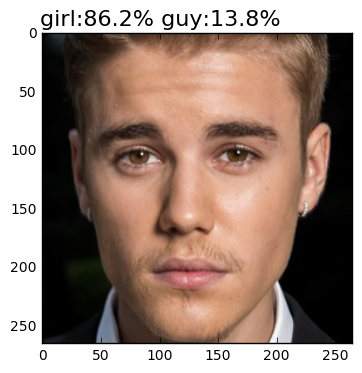

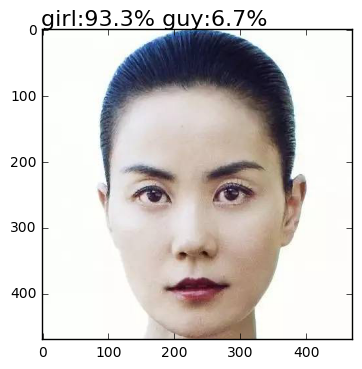

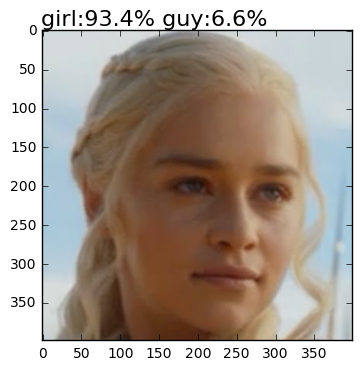

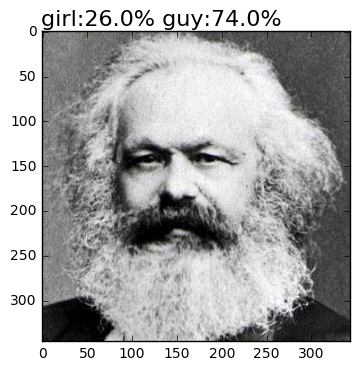

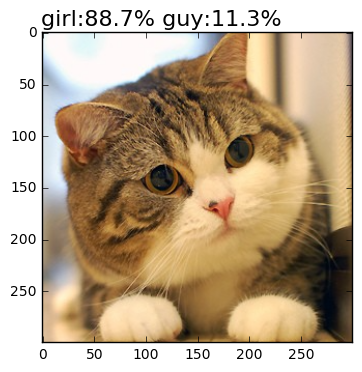

In [8]:
# Test data

import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display, Image, Javascript
import PIL

disable_js = """
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
"""
display(Javascript(disable_js))

%matplotlib inline

test_images = [ PIL.Image.open(f) for f in glob('data/test/*') ]

def img2array(im):
    if im.mode != 'RGB':
        im = im.convert(mode='RGB')
    return np.fromstring(im.tobytes(), dtype='uint8').reshape((im.size[1], im.size[0], 3))

for img in test_images:
    plt.figure()
    plt.imshow(img2array(img))
    img = img.resize((32, 32)).convert('L')
    image_data = np.asarray(img.getdata())

    girl_p, guy_p = model.predict(np.atleast_2d(image_data), verbose=0)[0]
    girl_p = round(girl_p * 100, 1)
    guy_p = round(guy_p * 100, 1)
    caption = 'girl:' + str(girl_p) + '% guy:' + str(guy_p) + '%'
    plt.text(-2, -7, caption, fontdict={'fontsize': 16})
    